# Preprocessing of Dataset
- Dataset file: "PM_train.txt"

Dataset Column Description (from official dataset data card)
- id
- - "A unique identifier for each data entry."
- cycle
- - "Denotes the operational cycle or period, indicating the stage or duration of engine operation."
- setting1, setting2, setting3
- - "Numerical values representing various operational settings or parameters of the aircraft engine."
- s1 to s21
- - "Numeric sensor readings obtained from 21 different sensors installed on the engine. These readings encompass a range of physical measurements, including but not limited to temperature, pressure, and other relevant parameters."

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset loading via .xlsx file type. 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I chose to port data into the project via excel to ensure data preservation
pm_test_df = pd.read_excel('../data/dataset_a_s_e_p/PM_test.xlsx')

# Data exploration
print("Print first 20 rows of each column:\n", pm_test_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df.describe())

Print first 20 rows of each column:
     id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0    1      1    0.0023    0.0003       100  518.67  643.02  1585.29  1398.21   
1    1      2   -0.0027   -0.0003       100  518.67  641.71  1588.45  1395.42   
2    1      3    0.0003    0.0001       100  518.67  642.46  1586.94  1401.34   
3    1      4    0.0042    0.0000       100  518.67  642.44  1584.12  1406.42   
4    1      5    0.0014    0.0000       100  518.67  642.51  1587.19  1401.92   
5    1      6    0.0012    0.0003       100  518.67  642.11  1579.12  1395.13   
6    1      7    0.0000    0.0002       100  518.67  642.11  1583.34  1404.84   
7    1      8    0.0006    0.0000       100  518.67  642.54  1580.89  1400.89   
8    1      9   -0.0036    0.0000       100  518.67  641.88  1593.29  1412.28   
9    1     10   -0.0025   -0.0001       100  518.67  642.07  1585.25  1398.64   
10   1     11    0.0007   -0.0004       100  518.67  642.04  1581.03  14

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset cleaning via generalized NA row drop. (Not required because data validity is at 100%)

In [2]:
# Check for missing data
print("\n Null values: \n", pm_test_df.isnull().sum()) # Verifies 100% data validity.


 Null values: 
 id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64


In [3]:
# Generalized NA drop is not required because the data card indicates that 100% of the data is valid
# pm_test_df_clean = pm_test_df.dropna()
pm_test_df_clean = pm_test_df.copy()

# Confirmation of null removal
print("\n Null values: \n", pm_test_df_clean.isnull().sum())

# Check for constants
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df_clean.describe())


 Null values: 
 id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64
                 id         cycle      setting1      setting2  setting3  \
count  11939.000000  11939.000000  11939.000000  11939.000000   11939.0   
mean      47.219281     76.401541     -0.000006      0.000001     100.0   
std       25.796561     52.750586      0.002199      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       25.000000     33.000000     -0.001500     -0.000200     100.0   
50%       49.000000     68.000000      0.000000      0.000000     100.0   
75%       68.000000    112.000000      0.001500      0.000300     100.0   
max   

Constants Identified
- Constants, near-constants, and other excluded columns:
- - setting1
  - setting2
  - setting3
  - s1
  - s6
  - s10
  - s16
  - s18
  - s19

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset normalization via z-score
standarized scaling:
- Centering each feature to zero mean
- Scaling to unit variance

In [4]:
# Feature columns to ensure only features are normalized
feature_columns = [f's{i}' for i in range(1, 22) if i not in [1, 6, 10, 16, 18, 19]]

print(feature_columns)

# Pre-data "normalization" check
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df_clean.describe())

# Mean/STD calculation of pm_test
mean = pm_test_df_clean[feature_columns].mean()
std = pm_test_df_clean[feature_columns].std()

# Standardization of each column
pm_test_df_clean.loc[:, feature_columns] = (
    pm_test_df_clean[feature_columns] - mean) / std


# Scaling confirmation
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df_clean.describe())

['s2', 's3', 's4', 's5', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
                 id         cycle      setting1      setting2  setting3  \
count  11939.000000  11939.000000  11939.000000  11939.000000   11939.0   
mean      47.219281     76.401541     -0.000006      0.000001     100.0   
std       25.796561     52.750586      0.002199      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       25.000000     33.000000     -0.001500     -0.000200     100.0   
50%       49.000000     68.000000      0.000000      0.000000     100.0   
75%       68.000000    112.000000      0.001500      0.000300     100.0   
max       92.000000    303.000000      0.007800      0.000700     100.0   

                 s1            s2            s3            s4            s5  \
count  1.193900e+04  11939.000000  11939.000000  11939.000000  11939.000000   
mean   5.186700e+02    642.474090   1588.088548   1404.705402     1

- Columns excluded from model
- - True constants
  - Near constant
  - Columns excluded:
  - - s1, s6, s10, s16, s18, s19

# Implementation of Multi-feature Linear Regression with Batch Gradient Descent

For multi-feature linear regression, the model is:

y = Xw + b

- Where:
- - y = predicted value (vector)
- - X = input data matrix (rows=samples, columns=features)
- - w = weights (vector, one per feature)
- - b = bias/intercept (scalar)

In [5]:
# Prediction function/formula
def predict(X, w, b):
    # X: shape (n_samples, n_features)
    # w: shape (n_features,)
    # b: scalar
    return np.dot(X, w) + b

Cost function: MSE (Mean Squared Error)

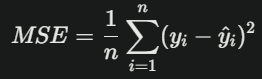


In [6]:
# MSE cost function implementation
def cost(y_actual, y_predict):
    return np.mean((y_actual - y_predict) ** 2)

Batch Gradient Descent Update Rule:

θ=θ−η⋅∇J(θ)

- Where:
- - θ: Represents the parameters or weights of the model that you want to optimize.
  - J(θ): Denotes the cost function (or loss function), which measures how well the model is performing given the parameters θ. The goal is to minimize this function.
  - ∇J(θ): Is the gradient of the cost function with respect to the parameters θ. This gradient is a vector that points in the direction of the steepest increase of the cost function.
  - η: Is the learning rate, a small positive scalar that determines the step size taken in the parameter space during each update.

# Run and Set-up of Batch Gradient Descent with Demo Data to Verify Functionality

In [7]:
# Set-up for learning model
# Example: create random (dummy) data for demo purposes
np.random.seed(42)          # .seed() ensures that the random numbers generated are the same each time the program is run
n_samples = 100
n_features = 3
X_demo = np.random.randn(n_samples, n_features)    # Features matrix
weights_true = np.array([1.5, -2.0, 1.0])            # True weights (for testing)
y_demo = X_demo @ weights_true + 0.5             # y = Xw + b, with true bias 0.5

In [8]:
# Verify shape of X
print(X_demo.shape)

(100, 3)


In [9]:
# Function creation for Multi-variate Gradient Descent
def g_d_funct(X, y, learning_rate, b, iterations):
    n_features = X.shape[1] # Obtains length of training set
    w = np.zeros(n_features)
    total_cost = []
    
    for i_1 in range(iterations):
        # Predict
        y_predict = predict(X, w, b)
        # Compute cost
        cost_per_it = cost(y, y_predict)
        total_cost.append(cost_per_it)
    
        # Compute gradients
        # Gradient w.r.t w: -2/n * X.T @ (y_true - y_pred)
        # Gradient w.r.t b: -2/n * sum(y_true - y_pred)
        n = X.shape[0]
        dw = -2/n * np.dot(X.T, (y - y_predict))
        db = -2/n * np.sum(y - y_predict)
    
        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db
    
        # Print progress every 10 epochs (optional)
        if i_1 % 10 == 0:
            print(f"Iteration: {i_1}: cost={cost_per_it:.4f}")
    
    print("Final weights:", w)
    print("Final bias:", b)
    return b, w, total_cost

In [55]:
demo_b, demo_w, demo_total_cost = g_d_funct(X=X_demo, y=y_demo, b=0., learning_rate=0.01, iterations=410)

Iteration: 0: cost=8.1401
Iteration: 10: cost=5.0957
Iteration: 20: cost=3.2344
Iteration: 30: cost=2.0841
Iteration: 40: cost=1.3644
Iteration: 50: cost=0.9079
Iteration: 60: cost=0.6141
Iteration: 70: cost=0.4220
Iteration: 80: cost=0.2944
Iteration: 90: cost=0.2083
Iteration: 100: cost=0.1492
Iteration: 110: cost=0.1080
Iteration: 120: cost=0.0790
Iteration: 130: cost=0.0583
Iteration: 140: cost=0.0433
Iteration: 150: cost=0.0323
Iteration: 160: cost=0.0243
Iteration: 170: cost=0.0183
Iteration: 180: cost=0.0138
Iteration: 190: cost=0.0105
Iteration: 200: cost=0.0080
Iteration: 210: cost=0.0061
Iteration: 220: cost=0.0047
Iteration: 230: cost=0.0036
Iteration: 240: cost=0.0027
Iteration: 250: cost=0.0021
Iteration: 260: cost=0.0016
Iteration: 270: cost=0.0012
Iteration: 280: cost=0.0009
Iteration: 290: cost=0.0007
Iteration: 300: cost=0.0006
Iteration: 310: cost=0.0004
Iteration: 320: cost=0.0003
Iteration: 330: cost=0.0003
Iteration: 340: cost=0.0002
Iteration: 350: cost=0.0002
Ite

After fine tuning the learning rate and number of iterations, it appears 410 iterations and a learning rate of 0.01 is appropriate for the training data. 

Text(0, 0.5, 'Cost')

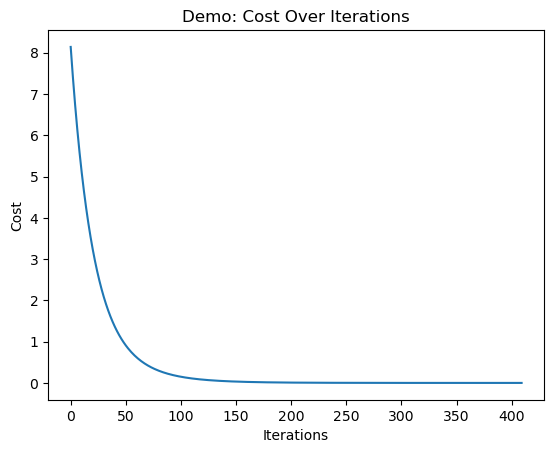

In [56]:
sns.lineplot(demo_total_cost)
plt.title('Demo: Cost Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

Multi-feature gradient descent functionality has been verified with demo data. 

# Train Based Off Training Data

- Understanding our dataset
- - In our dataset, we have three files:
  - - PM_test.xlsx
    - - Designated for algorithm testing
    - PM_train.xlsx
    - - Designated for algorithm training
    - PM_truth.xlsx
    - - Contains informaton that states which cycle the engine failed at. 

In [34]:
# Load training set
pm_train_df = pd.read_excel('../data/dataset_a_s_e_p/PM_train.xlsx')

# Data exploration
print("Print first 20 rows of each column:\n", pm_train_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_train_df.describe())

Print first 20 rows of each column:
     id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0    1      1   -0.0007   -0.0004       100  518.67  641.82  1589.70  1400.60   
1    1      2    0.0019   -0.0003       100  518.67  642.15  1591.82  1403.14   
2    1      3   -0.0043    0.0003       100  518.67  642.35  1587.99  1404.20   
3    1      4    0.0007    0.0000       100  518.67  642.35  1582.79  1401.87   
4    1      5   -0.0019   -0.0002       100  518.67  642.37  1582.85  1406.22   
5    1      6   -0.0043   -0.0001       100  518.67  642.10  1584.47  1398.37   
6    1      7    0.0010    0.0001       100  518.67  642.48  1592.32  1397.77   
7    1      8   -0.0034    0.0003       100  518.67  642.56  1582.96  1400.97   
8    1      9    0.0008    0.0001       100  518.67  642.12  1590.98  1394.80   
9    1     10   -0.0033    0.0001       100  518.67  641.71  1591.24  1400.46   
10   1     11    0.0018   -0.0003       100  518.67  642.28  1581.75  14

In [35]:
# Load truth set
pm_target_df = pd.read_excel('../data/dataset_a_s_e_p/PM_truth.xlsx')

# Data exploration
print("Print first 20 rows of each column:\n", pm_target_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_target_df.describe())

Print first 20 rows of each column:
     more  id
0     98   1
1     69   2
2     82   3
3     91   4
4     93   5
5     91   6
6     95   7
7    111   8
8     96   9
9     97  10
10   124  11
11    95  12
12   107  13
13    83  14
14    84  15
15    50  16
16    28  17
17    87  18
18    16  19
19    57  20

Data description:

             more         id
count   99.000000  99.000000
mean    75.151515  50.000000
std     41.813816  28.722813
min      7.000000   1.000000
25%     31.500000  25.500000
50%     85.000000  50.000000
75%    112.000000  74.500000
max    145.000000  99.000000


# Data Prep for Training Set

PM_train.xlsx
- No NA drop needed
- - 100% of data is valid
- Z-Score Normalization
- - Excluded columns expands to include s5 because it has an STD of 0 in the training dataset
  - - setting 1, setting 2, setting 3, s1, s5, s6, s10, s16, s18, s19

# Prep Training Data (Pre-Fine-Tuning)

# Prep Training Data (Post-Fine Tuning)

In [221]:
# NA drop not required
pm_train_df_clean = pm_train_df.copy()

# Feature columns to ensure only features are normalized
train_feature_columns = [f's{i}' for i in range(2, 22) if i not in [5, 6, 10, 16, 18, 19]] 

print(train_feature_columns)

# Pre-data "normalization" check
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_train_df_clean.describe())

# Mean/STD calculation of pm_test
mean = pm_train_df_clean[train_feature_columns].mean()
std = pm_train_df_clean[train_feature_columns].std()

# Standardization of each column
pm_train_df_clean[train_feature_columns] = pm_train_df_clean[train_feature_columns].astype(float)
pm_train_df_clean.loc[:, train_feature_columns] = (pm_train_df_clean[train_feature_columns] - mean) / std


# Scaling confirmation
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_train_df_clean.describe())

['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
                 id         cycle      setting1      setting2  setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862     -0.000009      0.000002     100.0   
std       29.227633     68.880990      0.002187      0.000293       0.0   
min        1.000000      1.000000     -0.008700     -0.000600     100.0   
25%       26.000000     52.000000     -0.001500     -0.000200     100.0   
50%       52.000000    104.000000      0.000000      0.000000     100.0   
75%       77.000000    156.000000      0.001500      0.000300     100.0   
max      100.000000    362.000000      0.008700      0.000600     100.0   

                 s1            s2            s3            s4            s5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+

# Selection of Feature and Target Data

Merging of Features and Target Data

In [222]:
# Data prep for truth set
# No NA drop or Z-score normalization required

merged_train_df = pd.merge(pm_train_df_clean, pm_target_df, on='id')
merged_train_df['RUL'] = merged_train_df['more'] - merged_train_df['cycle'] # RUL (Remaining Useful Life) 

features_data = merged_train_df[train_feature_columns]

target_data = merged_train_df['more'] # 'more' is name of the column which houses the cycle number of when each engine failed

Conversion of Data to Numpy Arrays of Training

In [223]:
X_train = features_data.to_numpy()
y_train = target_data.to_numpy()

In [225]:
training_b, training_w, training_total_cost = g_d_funct(X=X_train, y=y_train, b=75.15, learning_rate=0.05, iterations=2000)

Iteration: 0: cost=1715.0427
Iteration: 10: cost=1710.8099
Iteration: 20: cost=1710.4042
Iteration: 30: cost=1710.2579
Iteration: 40: cost=1710.1788
Iteration: 50: cost=1710.1302
Iteration: 60: cost=1710.0990
Iteration: 70: cost=1710.0784
Iteration: 80: cost=1710.0645
Iteration: 90: cost=1710.0550
Iteration: 100: cost=1710.0482
Iteration: 110: cost=1710.0434
Iteration: 120: cost=1710.0398
Iteration: 130: cost=1710.0372
Iteration: 140: cost=1710.0351
Iteration: 150: cost=1710.0334
Iteration: 160: cost=1710.0321
Iteration: 170: cost=1710.0309
Iteration: 180: cost=1710.0300
Iteration: 190: cost=1710.0291
Iteration: 200: cost=1710.0284
Iteration: 210: cost=1710.0277
Iteration: 220: cost=1710.0271
Iteration: 230: cost=1710.0265
Iteration: 240: cost=1710.0260
Iteration: 250: cost=1710.0255
Iteration: 260: cost=1710.0251
Iteration: 270: cost=1710.0246
Iteration: 280: cost=1710.0242
Iteration: 290: cost=1710.0239
Iteration: 300: cost=1710.0235
Iteration: 310: cost=1710.0232
Iteration: 320: cos

# Pre-Fine-Tuning
Batch Multi-variate Gradient Descent converged at:
- Bias: 75.15
- Learning Rate: 0.1069
- Iterations: 520

- Iteration:
  - 510: cost=1710.0178
- Final weights:
  - Column: s2
    - -0.76706377
  - Column: s3
    - 0.20958749
  - Column: s4
    - 0.18162735
  - Column: s7
    - -0.21023765
  - Column: s8
    - -0.72141724
  - Column: s9
    - 1.16892934
  - Column: s11
    - 0.25597593
  - Column: s12
    - -0.95951033
  - Column: s13
    - -1.27473515
  - Column: s14
    - -0.25125697
  - Column: s15
    - 0.02137978
  - Column: s17
    - -0.04622656
  - Column: s20
    - -0.44280538
  - Column: s21
    - 0.64886348
- Final bias:
  - 76.45043851813027

# Post-Fine-Tuning
Batch Multi-variate Gradient Descent converged at:
- Bias: 75.15
- Learning Rate: 0.1069
- Iterations: 520

Text(0, 0.5, 'Cost')

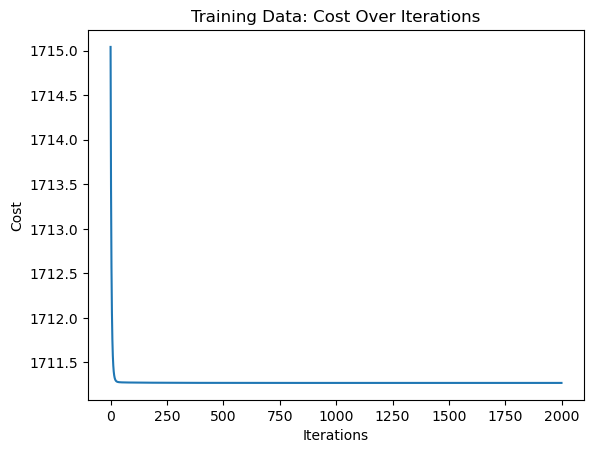

In [117]:
sns.lineplot(training_total_cost)
plt.title('Training Data: Cost Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Load Test Data

In [226]:
# Load truth set
pm_test_df = pd.read_excel('../data/dataset_a_s_e_p/PM_test.xlsx')

# Data exploration
print("Print first 20 rows of each column:\n", pm_test_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df.describe())

Print first 20 rows of each column:
     id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0    1      1    0.0023    0.0003       100  518.67  643.02  1585.29  1398.21   
1    1      2   -0.0027   -0.0003       100  518.67  641.71  1588.45  1395.42   
2    1      3    0.0003    0.0001       100  518.67  642.46  1586.94  1401.34   
3    1      4    0.0042    0.0000       100  518.67  642.44  1584.12  1406.42   
4    1      5    0.0014    0.0000       100  518.67  642.51  1587.19  1401.92   
5    1      6    0.0012    0.0003       100  518.67  642.11  1579.12  1395.13   
6    1      7    0.0000    0.0002       100  518.67  642.11  1583.34  1404.84   
7    1      8    0.0006    0.0000       100  518.67  642.54  1580.89  1400.89   
8    1      9   -0.0036    0.0000       100  518.67  641.88  1593.29  1412.28   
9    1     10   -0.0025   -0.0001       100  518.67  642.07  1585.25  1398.64   
10   1     11    0.0007   -0.0004       100  518.67  642.04  1581.03  14

# Prep Test Data (Pre-Fine Tuning)

# Prep Test Data (Post-Fine Tuning)

In [227]:
# NA drop not required
pm_test_df_clean = pm_test_df.copy()

# Feature columns to ensure only features are normalized
test_feature_columns = [f's{i}' for i in range(2, 22) if i not in [5, 6, 10, 16, 18, 19]] 
# Despite s5 having an std greater than 0, it still needs to be dropped to avoid an alignment error.

print(test_feature_columns)

# Pre-data "normalization" check
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df_clean.describe())

# Mean/STD calculation of pm_test
mean = pm_test_df_clean[test_feature_columns].mean()
std = pm_test_df_clean[test_feature_columns].std()

# Standardization of each column
pm_test_df_clean.loc[:, test_feature_columns] = (
    pm_test_df_clean[test_feature_columns] - mean) / std


# Scaling confirmation
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df_clean.describe())

['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
                 id         cycle      setting1      setting2  setting3  \
count  11939.000000  11939.000000  11939.000000  11939.000000   11939.0   
mean      47.219281     76.401541     -0.000006      0.000001     100.0   
std       25.796561     52.750586      0.002199      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       25.000000     33.000000     -0.001500     -0.000200     100.0   
50%       49.000000     68.000000      0.000000      0.000000     100.0   
75%       68.000000    112.000000      0.001500      0.000300     100.0   
max       92.000000    303.000000      0.007800      0.000700     100.0   

                 s1            s2            s3            s4            s5  \
count  1.193900e+04  11939.000000  11939.000000  11939.000000  11939.000000   
mean   5.186700e+02    642.474090   1588.088548   1404.705402     14.6188

PM_test.xlsx
- No NA drop needed
- - 100% of data is valid
- Z-Score Normalization
- - Excluded columns expands to include s5 because it has an STD of 0 in the training dataset
  - - setting 1, setting 2, setting 3, s1, s5, s6, s10, s16, s18, s19

# Create X_test and y_test

In [228]:
# Creation of X_test
test_features_data = pm_test_df_clean[test_feature_columns]

# Merge of truth and test tables

merged_test_df = pd.merge(pm_test_df_clean, pm_target_df, on='id')
merged_test_df['RUL'] = merged_test_df['more'] - merged_test_df['cycle'] # RUL (Remaining Useful Life) 

test_features_data = merged_test_df[test_feature_columns]
test_target_data = merged_test_df['more'] # 'more' is name of the column which houses the cycle number of when each engine failed

# Conversion to Numpy Array
X_test = test_features_data.to_numpy()
y_test = test_target_data.to_numpy()

# Predict Actual Data with 'training_b' and 'training_w' 

In [229]:
# Use predict function to test final 'w' and 'b' values
y_pred_test = predict(X_test, training_w, training_b)

# Calculate MSE (Mean Squared Error)
mse = np.mean((y_test - y_pred_test) ** 2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse) # Puts MSE back into the root unit. Increases readablility.

print(f'Test RMSE: {rmse:.4f}')

Test RMSE: 42.1801


In order to guage the accuracy of my Mult-Variate Gradient Descent algorithm, I need to compare the RMSE with the std of my target variables.

In [230]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_target_df.describe())

             more         id
count   99.000000  99.000000
mean    75.151515  50.000000
std     41.813816  28.722813
min      7.000000   1.000000
25%     31.500000  25.500000
50%     85.000000  50.000000
75%    112.000000  74.500000
max    145.000000  99.000000


Standard deviation (std) of target variables:
- 41.81

RMSE of prediction:
- 42.18

Relative RMSE = RMSE / std (target)
- 1.00

Unfortunately, this indicates that while my Multi-Variate Batch Gradient Desent model is accurate and functional, it is currently useless because it is not out performing the standard deviation of the target.

# Feature Engineering and Fine-Tuning

Step 1:
- Removing low std feature columns from training feature columns:
  - Current feature columns:
    - s2, s3, s4, s7, s8, s9, s11, s12, s13, s14, s15, s17, s20, s21
  - Feature columns with std below 1:
    - s2, s7, s8, s11, s12, s13, s15, s20, s21

No improvement. Negligable degrigation.

Step 2:
- Removing irrelevant/weakly correlated Features
  - Methods:
    - Correlation analysis (LASSO)

# LASSO Regression from scratch adaptation (Cost Function)

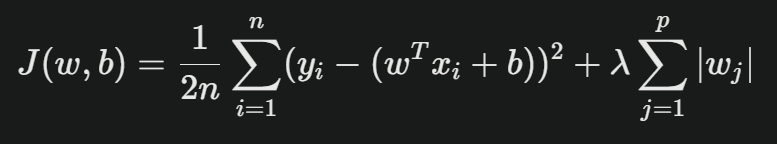

(AKA: L1-regularized least squares cost function)

Where
- b = bias
- lambda = regularization strength

In [231]:
# In order to implement LASSO Regression from scratch, I will be creating a new function that is specifically designed around the advancement.

def lasso_batch_gradient_descent(X, y, learning_rate=0.01, b=0.0, lambda_=0.1, iterations=1000):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    cost_history = []
    
    
    for i_1 in range(iterations):
        y_pred = X.dot(w) + b
        residual = y - y_pred

        # Gradients
        dw = (-1/n_samples) * X.T.dot(residual) + lambda_ * np.sign(w)
        db = (-1/n_samples) * np.sum(residual)

        # Update rules
        w -= learning_rate * dw
        b -= learning_rate * db

        # Calculate cost
        cost = (1 / (2 * n_samples) * np.sum(residual ** 2) + lambda_ * np.sum(np.abs(w)))
        cost_history.append(cost)
        
        # Print progress every 10 iterations
        if i_1 % 10 == 0:
            print(f"Iteration: {i_1}: Cost={cost:.4f}")
    
    print("Final Weights:", w)
    print("Final Bias:", b)
    print("Final Cost:", cost)

    return w, b, cost_history

In [265]:
# Calling lasso_batch_gradient_descent with training data
training_w_lasso, training_b_lasso, training_cost_history_lasso = lasso_batch_gradient_descent(
    X_train, y_train, learning_rate=0.0005, b=75.15, lambda_=.001, iterations=100000)

Iteration: 0: Cost=857.5214
Iteration: 10: Cost=857.4764
Iteration: 20: Cost=857.4331
Iteration: 30: Cost=857.3914
Iteration: 40: Cost=857.3512
Iteration: 50: Cost=857.3124
Iteration: 60: Cost=857.2750
Iteration: 70: Cost=857.2387
Iteration: 80: Cost=857.2037
Iteration: 90: Cost=857.1697
Iteration: 100: Cost=857.1368
Iteration: 110: Cost=857.1049
Iteration: 120: Cost=857.0738
Iteration: 130: Cost=857.0437
Iteration: 140: Cost=857.0144
Iteration: 150: Cost=856.9859
Iteration: 160: Cost=856.9581
Iteration: 170: Cost=856.9310
Iteration: 180: Cost=856.9046
Iteration: 190: Cost=856.8789
Iteration: 200: Cost=856.8537
Iteration: 210: Cost=856.8292
Iteration: 220: Cost=856.8052
Iteration: 230: Cost=856.7818
Iteration: 240: Cost=856.7588
Iteration: 250: Cost=856.7364
Iteration: 260: Cost=856.7145
Iteration: 270: Cost=856.6930
Iteration: 280: Cost=856.6720
Iteration: 290: Cost=856.6513
Iteration: 300: Cost=856.6311
Iteration: 310: Cost=856.6114
Iteration: 320: Cost=856.5919
Iteration: 330: Cost=

w_lasso, b_lasso, cost_lasso = lasso_batch_gradient_descent(X_train, y_train, learning_rate=0.65, b=75.15, lambda_=.000005, iterations=110)

Iteration: 100: Cost=855.6350
Final Weights: [-0.05259611 -0.50303332  1.00185146  0.46146711 -0.38314398]
Final Bias: 76.44967747532968
Final Cost: 855.6350246158033

training_w_lasso, training_b_lasso, training_cost_history_lasso = lasso_batch_gradient_descent(X_train, y_train, learning_rate=0.0025, b=75.15, lambda_=.005, iterations=10000)
Iteration: 9990: Cost=855.0161
Final Weights: [-0.76369018  0.20950737  0.18525946 -0.21201522 -0.70918278  0.83428439
  0.25672186 -0.95178193 -1.25553051  0.08131705  0.02339275 -0.04275496
 -0.44396885  0.64109086]
Final Bias: 76.45050039031732
Final Cost: 855.016093453386

In [258]:
# Use predict function to test final 'w' and 'b' values
y_pred_test = predict(X_test, training_w_lasso, training_b_lasso)

# Calculate MSE (Mean Squared Error)
mse = np.mean((y_test - y_pred_test) ** 2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse) # Puts MSE back into the root unit. Increases readablility.

print(f'Test RMSE: {rmse:.4f}')

Test RMSE: 42.0939
